<h2>Create a cross-section from AWOT radar instance</h2>
<p> This example uses a gridded NetCDF windsyn file and produces a 2-panel plot
of horizontal CAPPI of reflectivity at 2 km. The flight track is overlaid along 
with wind vectors derived from the radar. 

In [1]:
# Load the needed packages
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

import awot
from awot.graph.common import create_basemap
from awot.graph import RadarHorizontalPlot, RadarVerticalPlot, FlightLevel

%matplotlib inline

<b>Supply input data and set some plotting parameters.</b>

In [2]:
# Set the project name
Project="DYNAMO"

# Choose what file to process
yymmdd, modn = '111124', '0351'

# Set the data directory
fDir = "/Users/guy/data/dynamo/"+yymmdd+"I/"

# Construct the full path name for windsyn NetCDF file
P3Radf = str(glob(fDir+"/*"+modn+"*windsyn*.nc")).strip('[]')
# Construct the full path name for Flight level NetCDF file
FltLevf = str(glob(fDir+"20*"+yymmdd+"*_DJ*.nc")).strip('[]')

corners = [77.8, -2.0, 79.6, -0.2]

figtitle = '24 Nov RCE'

<b>Set up some characteristics for plotting.</b>
<ul>
<li>Use Cylindrical Equidistant Area map projection.</li>
<li>Set the spacing of the barbs and X-axis time step for labels.</li>
<li>Set the start and end times for subsetting.</li>
<li>Add landmarks.</li>
</ul>

In [3]:
# Set up some characteristics for plotting

# Set map projection to use
proj = 'cea'

Wbarb_Spacing = 300 # Spacing of wind barbs along flight path (sec)

# Choose the X-axis time step (in seconds) where major labels will be
XlabStride = 60

# Optional settings
start_time = "2011-11-24 03:51:00"
end_time = "2011-11-24 04:57:00"

# Map spacing
dLon = 0.5
dLat = 0.5

# Should landmarks be plotted? [If yes, then modify the section below
Lmarks=True

if Lmarks:
    # Create a list of Landmark data
    LocMark = []
    
    # Add locations as [ StringName, Longitude, Latitude ,XlabelOffset, YlabelOffset]
    LocMark.append(['Diego Garcia', 72.4160, -7.3117, 0.1, -0.6])
    LocMark.append(['R/V Revelle', 80.5010, 0.12167, -0.4, -0.6])
    LocMark.append(['Gan', 73.1017, -0.6308, -0.9, 0.0])
    LocMark.append(['R/V Marai', 80.50, -7.98, -0.1, -0.6])

    # Build a few variables for plotting the labels
    # Build arrays for plotting
    Labels = []
    LabLons = []
    LabLats = []
    XOffset = []
    YOffset = []
    for L1, L2, L3, L4, L5 in LocMark:
        Labels.append(L1)
        LabLons.append(L2)
        LabLats.append(L3)
        XOffset.append(L4)
        YOffset.append(L5)

<b>Read in the flight and radar data</b>

In [4]:
fl1 = awot.io.read_netcdf(fname=FltLevf[1:-1], platform='p-3')
r1 = awot.io.read_windsyn_tdr_netcdf(fname=P3Radf[1:-1], field_mapping=None)

No time variable found, using StarTime to make AWOT time variable
time_diff does not exist in file...


<b>Make a cross-section following the flight track displayed in the top panel and use the vertical wind velocity field.</b>

Closest level: 2000.0


/Users/guy/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


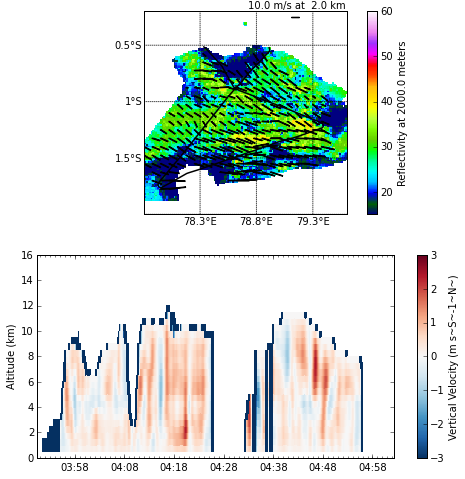

In [6]:
fig, (axPPI, axXS) = plt.subplots(2, 1, figsize=(8, 8))

# Set the map for plotting
bm1 = create_basemap(corners=corners, proj=proj, resolution='l', area_thresh=1., 
                     dLat=dLat, dLon=dLon, ax=axPPI)

# Create a Flightlevel instance for the track
flp1 = FlightLevel(fl1, basemap=bm1)

flp1.plot_trackmap(start_time=start_time, end_time=end_time,
                   min_altitude=50., max_altitude= 8000.,
                   addlegend=False, addtitle=False, ax=axPPI)

# Create a RadarGrid
rgp1 = RadarHorizontalPlot(r1, basemap=bm1)
# Add PPI plot at 2 km level
cappi_ht = 2000.
rgp1.plot_cappi('reflectivity', cappi_ht, vmin=15., vmax=60., title=' ',
#rgp1.plot_cappi('Uwind', 2., vmin=-20., vmax=20., title=' ',
#              cmap='RdBu_r',
              color_bar=True, cb_pad="10%", cb_loc='right', cb_tick_int=4,
              ax=axPPI)
rgp1.overlay_wind_vector(height_level=cappi_ht, vscale=200, vtrim=6, qcolor='0.50', 
                         refUposX=.75, refUposY=.97, plot_km=True)

flp1.plot_radar_cross_section(r1, 'Wwind', plot_km=True,
              start_time=start_time, end_time=end_time,
              vmin=-3., vmax=3., title=' ',
              cmap='RdBu_r',
              color_bar=True, cb_orient='vertical', cb_tick_int=4,
              x_axis_array='time',
              ax=axXS)

<b>Now let's make a vertical cross-section along lon/lat pairs of reflectivity</b>

Closest level: 2000.0


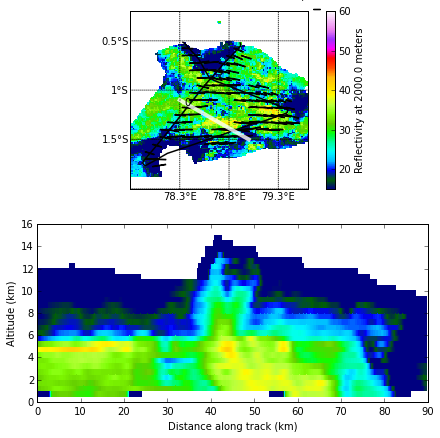

In [7]:
fig, (axPPI2, axXS2) = plt.subplots(2, 1, figsize=(7, 7))

# Set the map for plotting
bm2 = create_basemap(corners=corners, proj=proj, resolution='l', area_thresh=1., 
                     dLat=dLat, dLon=dLon, ax=axPPI2)

# Create a Flightlevel instance for the track
flp2 = FlightLevel(fl1, basemap=bm2)
flp2.plot_trackmap(start_time=start_time, end_time=end_time,
                   min_altitude=50., max_altitude= 8000.,
                   addlegend=False, addtitle=False, ax=axPPI2)

# Create a RadarGrid
rgph = RadarHorizontalPlot(r1, basemap=bm2)
# Add PPI plot at 2 km
rgph.plot_cappi('reflectivity', cappi_ht, vmin=15., vmax=60., title=' ',
              color_bar=True, cb_pad="10%", cb_loc='right', cb_tick_int=4,
              ax=axPPI2)
rgph.overlay_wind_vector(height_level=2., vscale=200, vtrim=6, qcolor='0.50')

# Add Cross-sectional line to horizontal plot
rgph.plot_line_geo([78.3, 79.0], [-1.1, -1.5], lw=4, alpha=.8, line_style='w-',
                   label0=True, label_offset=(0.05,-0.05))

rgph.plot_cross_section('reflectivity', (78.3, -1.1), (79.0, -1.5),
              vmin=15., vmax=60., title=' ',
              color_bar=False, cb_orient='vertical', cb_tick_int=4,
              plot_km=True, ax=axXS2)

# Alternatively the commented out code below will also display the plot

#rgpv = RadarVerticalPlot(fl1, instrument='tdr_grid')
# Add the cross-section along those coordinates
#rgpv.plot_cross_section('dBZ', (78.3, -1.1), (79.0, -1.5),
#              vmin=15., vmax=60., title=' ',
#              color_bar=False, cb_orient='vertical', cb_tick_int=4,
#              ax=axXS)

<b>Here's an alternative method to produce the same plot above</b>

Closest level: 2000.0


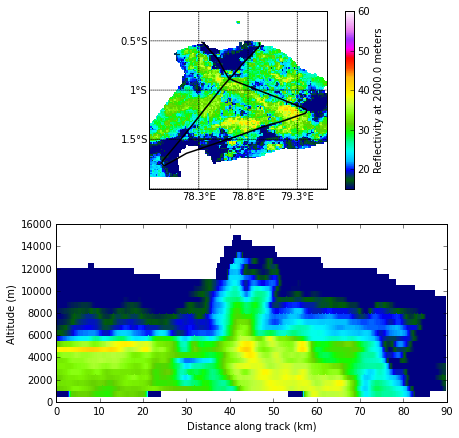

In [8]:
fig, (axPPI3, axXS3) = plt.subplots(2, 1, figsize=(7, 7))

# Set the map for plotting
bm3 = create_basemap(corners=corners, proj=proj, resolution='l', area_thresh=1., 
                     dLat=dLat, dLon=dLon, ax=axPPI3)
# Create a Flightlevel instance for the track
flp2 = FlightLevel(fl1, basemap=bm3)
flp2.plot_trackmap(start_time=start_time, end_time=end_time,
                   min_altitude=50., max_altitude= 8000.,
                   addlegend=False, addtitle=False, ax=axPPI3)

# Create a RadarGrid
rgph = RadarHorizontalPlot(r1, basemap=bm3)
# Add PPI plot at 2 km level
rgph.plot_cappi('reflectivity', cappi_ht, vmin=15., vmax=60., title=' ',
              color_bar=True, cb_pad="10%", cb_loc='right', cb_tick_int=4,
              ax=axPPI3)

rgpv = RadarVerticalPlot(r1, basemap=bm3)
# Add the cross-section along those coordinates
rgpv.plot_cross_section('reflectivity', (78.3, -1.1), (79.0, -1.5),
              vmin=15., vmax=60., title=' ',
              color_bar=False, cb_orient='vertical', cb_tick_int=4,
              ax=axXS3)